By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total available units, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a [logistic growth](https://en.wikipedia.org/wiki/Logistic_function) trend model, with a specified carrying capacity.

### Reference:
https://facebook.github.io/prophet/docs/saturating_forecasts.html

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet

In [3]:
def create_example_dataset(numpy_seed, saturate_max=True):
    np.random.seed(numpy_seed)
    x = np.linspace(250, 2000, 2000-250+1)
    
    if saturate_max:
        y = .50 * np.log(x) + 10 + np.random.randn(len(x))/10
    else:
        y = -.50 * np.log(x) + np.random.randn(len(x))/10
    start_date = pd.to_datetime('2000-01-01')
    ds = pd.date_range(start_date, periods=len(x))
    df = pd.DataFrame({'ds': ds, 'y': y})
    return df

## Create an example dataset

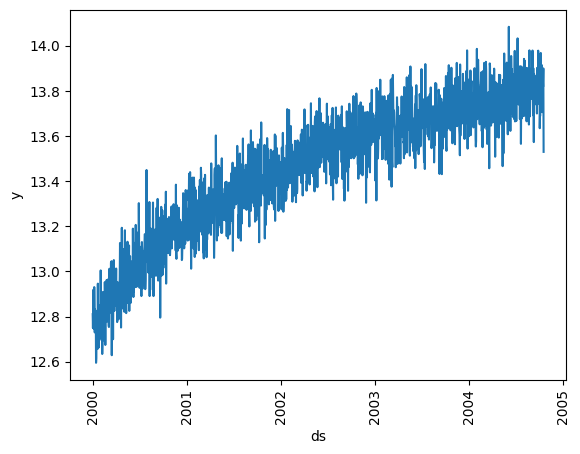

In [4]:
df = create_example_dataset(numpy_seed=42, saturate_max=True)
plt.plot(df['ds'], df['y'])
plt.xlabel('ds')
plt.ylabel('y')
plt.xticks(rotation=90);

## Fit the Default Profit Model 
The model does a good job capturing the trend in the forecast. Notice that the forecast mean and CI upper bound begin to exceed 14.

19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


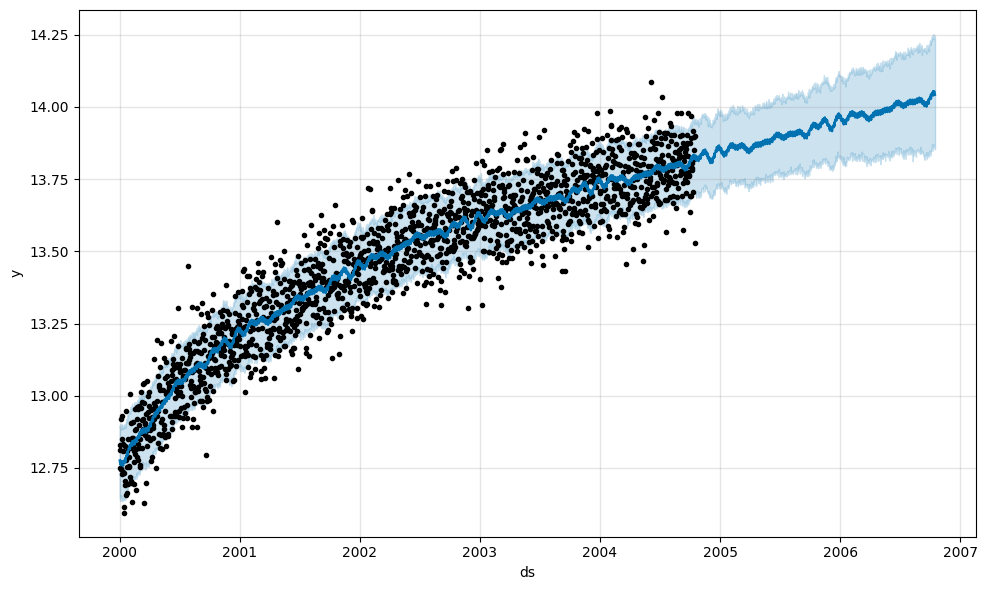

In [5]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=730, freq='D')
forecast = model.predict(future)
fig1 = model.plot(forecast)

## Apply a Saturating Maximum
We must specify the carrying capacity in a column `cap`. Here we will assume a particular value, but this would usually be set using data or expertise about the market/population size. 

The important things to note about `cap` are: 
- It must be specified for every row in the dataframe
- It does not have to be constant. If the market size is growing, then `cap` can be an increasing sequence.
- We must also specify the capacity in the future.

Prophet implements a soft capping mechanism for logistic growth models. This means it might not strictly enforce the cap value you provide, but rather gradually approach it asymptotically.

19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


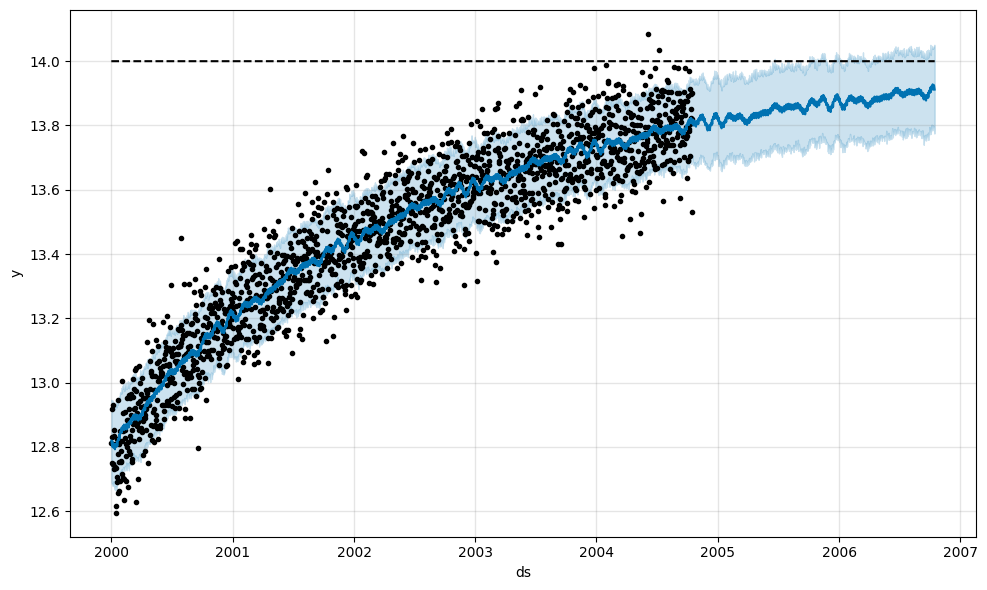

In [6]:
cap_value = 14
df['cap'] = cap_value
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=730, freq='D')
future['cap'] = cap_value
fcst = m.predict(future)
fig = m.plot(fcst)

## Apply a Saturating Minimum
The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum.

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.

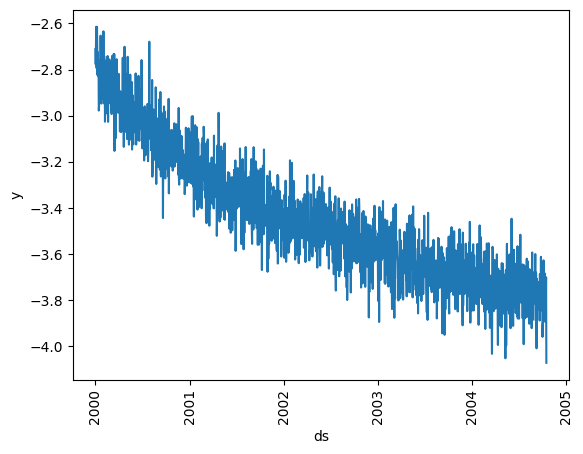

In [7]:
# create a decreasing time series
df = create_example_dataset(numpy_seed=42, saturate_max=False)
plt.plot(df['ds'], df['y'])
plt.xlabel('ds')
plt.ylabel('y')
plt.xticks(rotation=90);

19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing


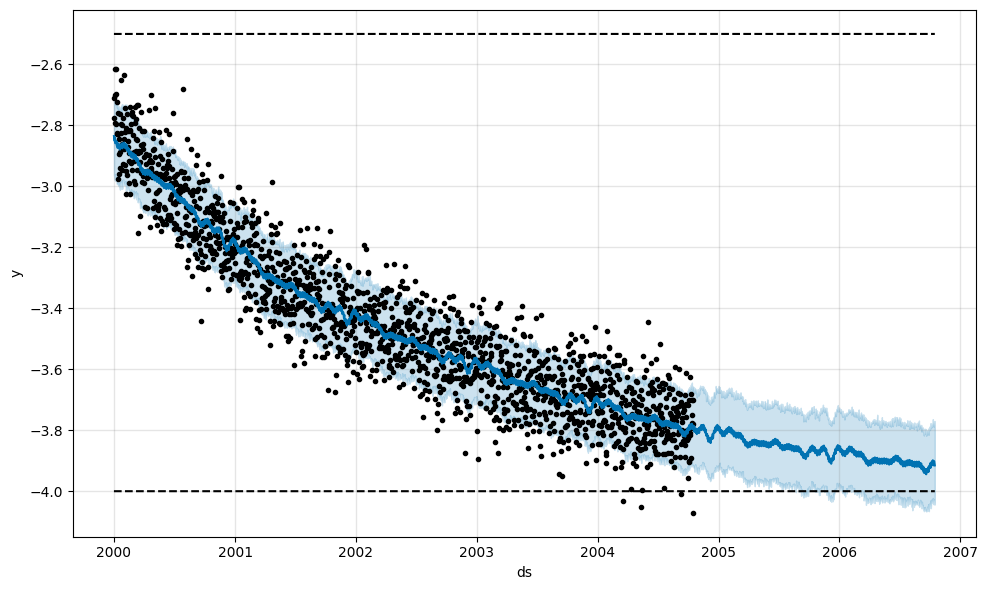

In [8]:
cap_value = -2.5
floor_value = -4
df['cap'] = cap_value
df['floor'] = floor_value
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=730, freq='D')
future['cap'] = cap_value
future['floor'] = floor_value
fcst = m.predict(future)
fig = m.plot(fcst)